<a href="https://colab.research.google.com/github/szhang12345/MSDS-422-Assignment-4---Random-Forests-and-Gradient-Boosting/blob/main/Assignment4_Random_Forests_and_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MSDS 422 Assignment 4: Random Forests and Gradient Boosting**

**By Siying Zhang**

**Topic: Boston Housing Study**


# Ingest

In [1]:
# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt  # for root mean-squared error calculation

# jt themes
!pip install jupyterthemes
import jupyterthemes
from jupyterthemes import jtplot

# IPython display
from IPython.display import display

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor # ensemble method
from sklearn.ensemble import GradientBoostingRegressor # ensemble method
# read data for the Boston Housing Study


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/szhang12345/MSDS-422-Assignment-4---Random-Forests-and-Gradient-Boosting/main"
DATA_PATH = "Datasets"
DATA_FILE = "boston.csv"
FILE_URL = "{}/{}/{}".format(DOWNLOAD_ROOT, DATA_PATH, DATA_FILE)

# Where to save the figures
PROJECT_ROOT_DIR = "./images/"
boston_input = pd.read_csv(FILE_URL)

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


     |████████████████████████████████| 7.0MB 4.6MB/s 
     |████████████████████████████████| 9.5MB 30.8MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 430kB 40.3MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
ERROR: google-colab 1.0.0 has requirement notebook~=5.3.0; python_version >= "3.0", but you'll have notebook 6.2.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  ...    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  ...    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  ...    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  ...    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  ...    3  222     18.7   5.33  36.2

[5 rows x 14 columns]
    neighborhood     crim   zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  ...    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  ...    1  273     21.0   9.08  20.6
503     Winthrop  0.06076  0.0  11.93     0  ...    1  273     21.0   5.64  23.9
504     Winthrop  0.10959  0.0  11.93     0  ...    1  273     21.0   6.48  22.0
505     Winthrop  0.04741  0.0  11.93     0  .

In [2]:
boston = boston.rename( columns = {'mv' : 'median_value', 'nox' : 'air_polution', 'crim' : 'crim_rate', \
                                   'zn' : 'pct_zoned_lots', 'indus' : 'pct_industrial', 'chas' : 'waterfront', \
                                   'rooms' : 'avg_rooms', 'age' : 'pct_pre1940', 'dis' : 'dis_center', \
                                   'rad' : 'highway_access', 'tax' : 'tax_rate',
                                   'ptratio' : 'pt_ratio', 'lstat' : 'pct_poor'})

# EDA

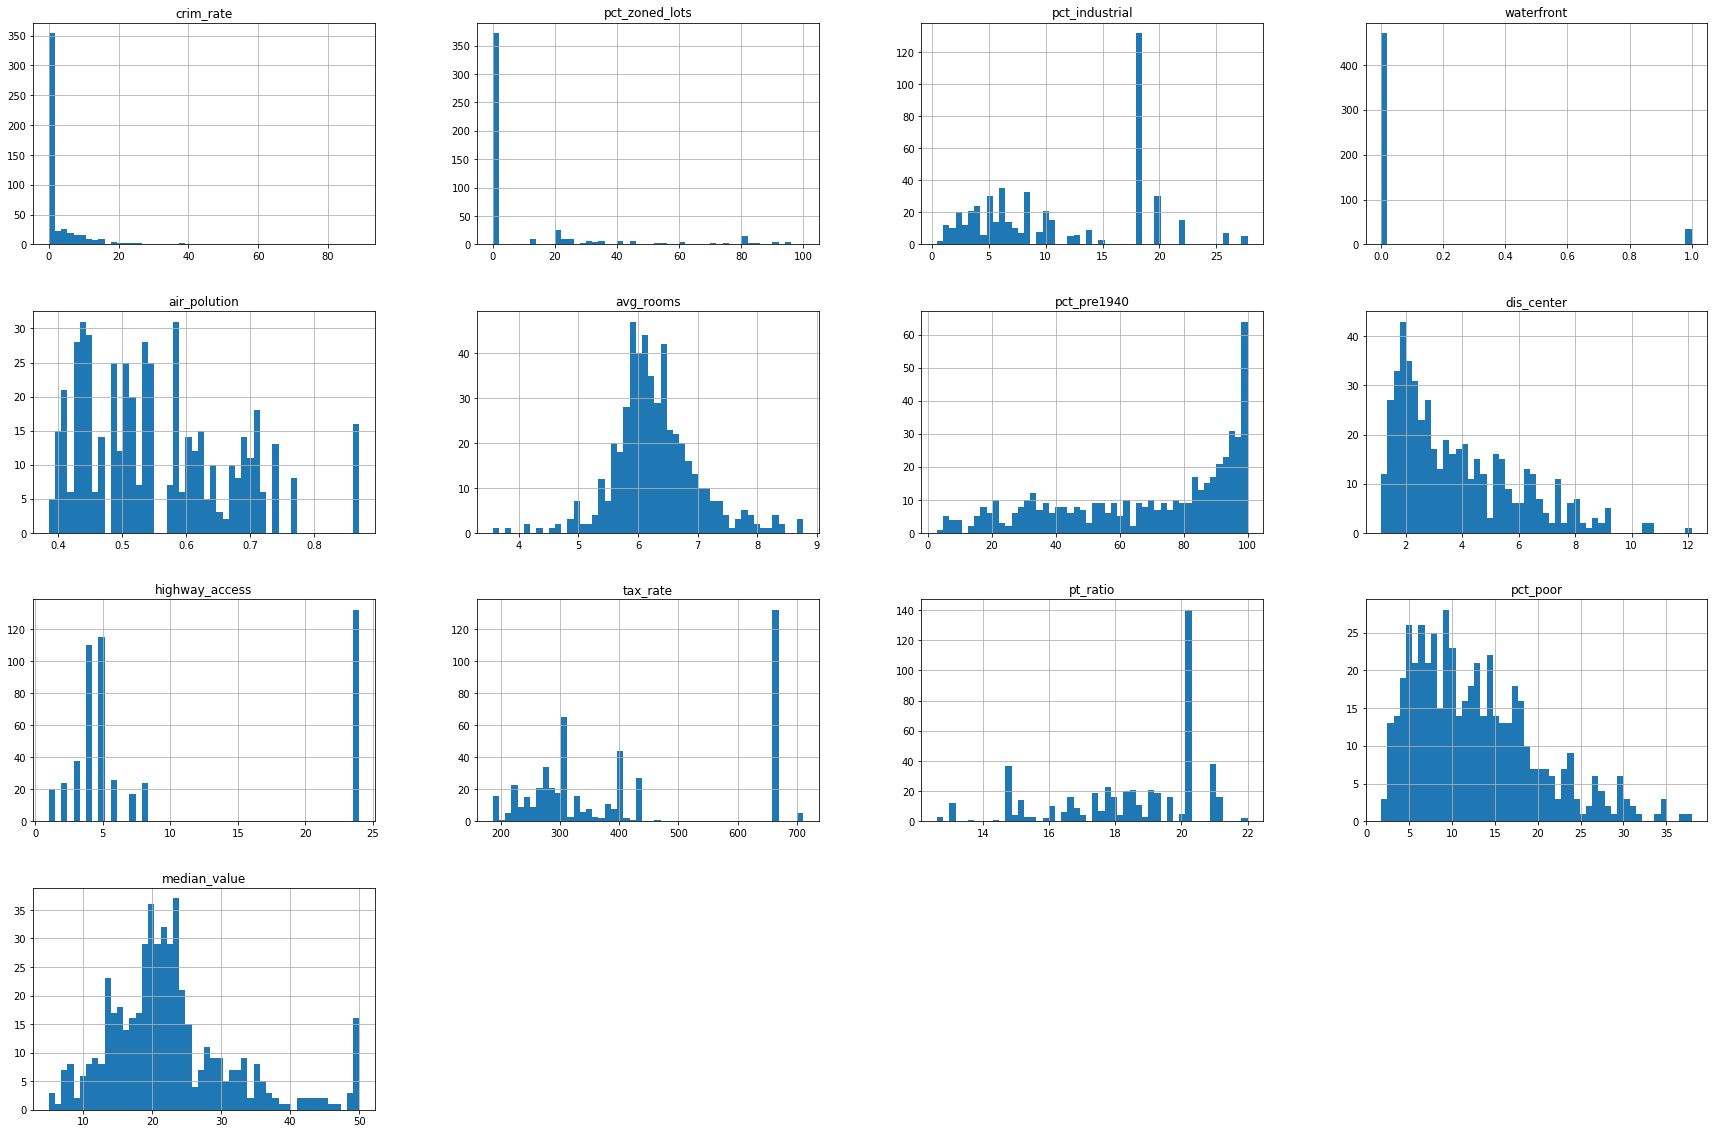

In [3]:
# Overal distributions of the variables
boston.hist( bins = 50, figsize = (30, 20)); plt.show()

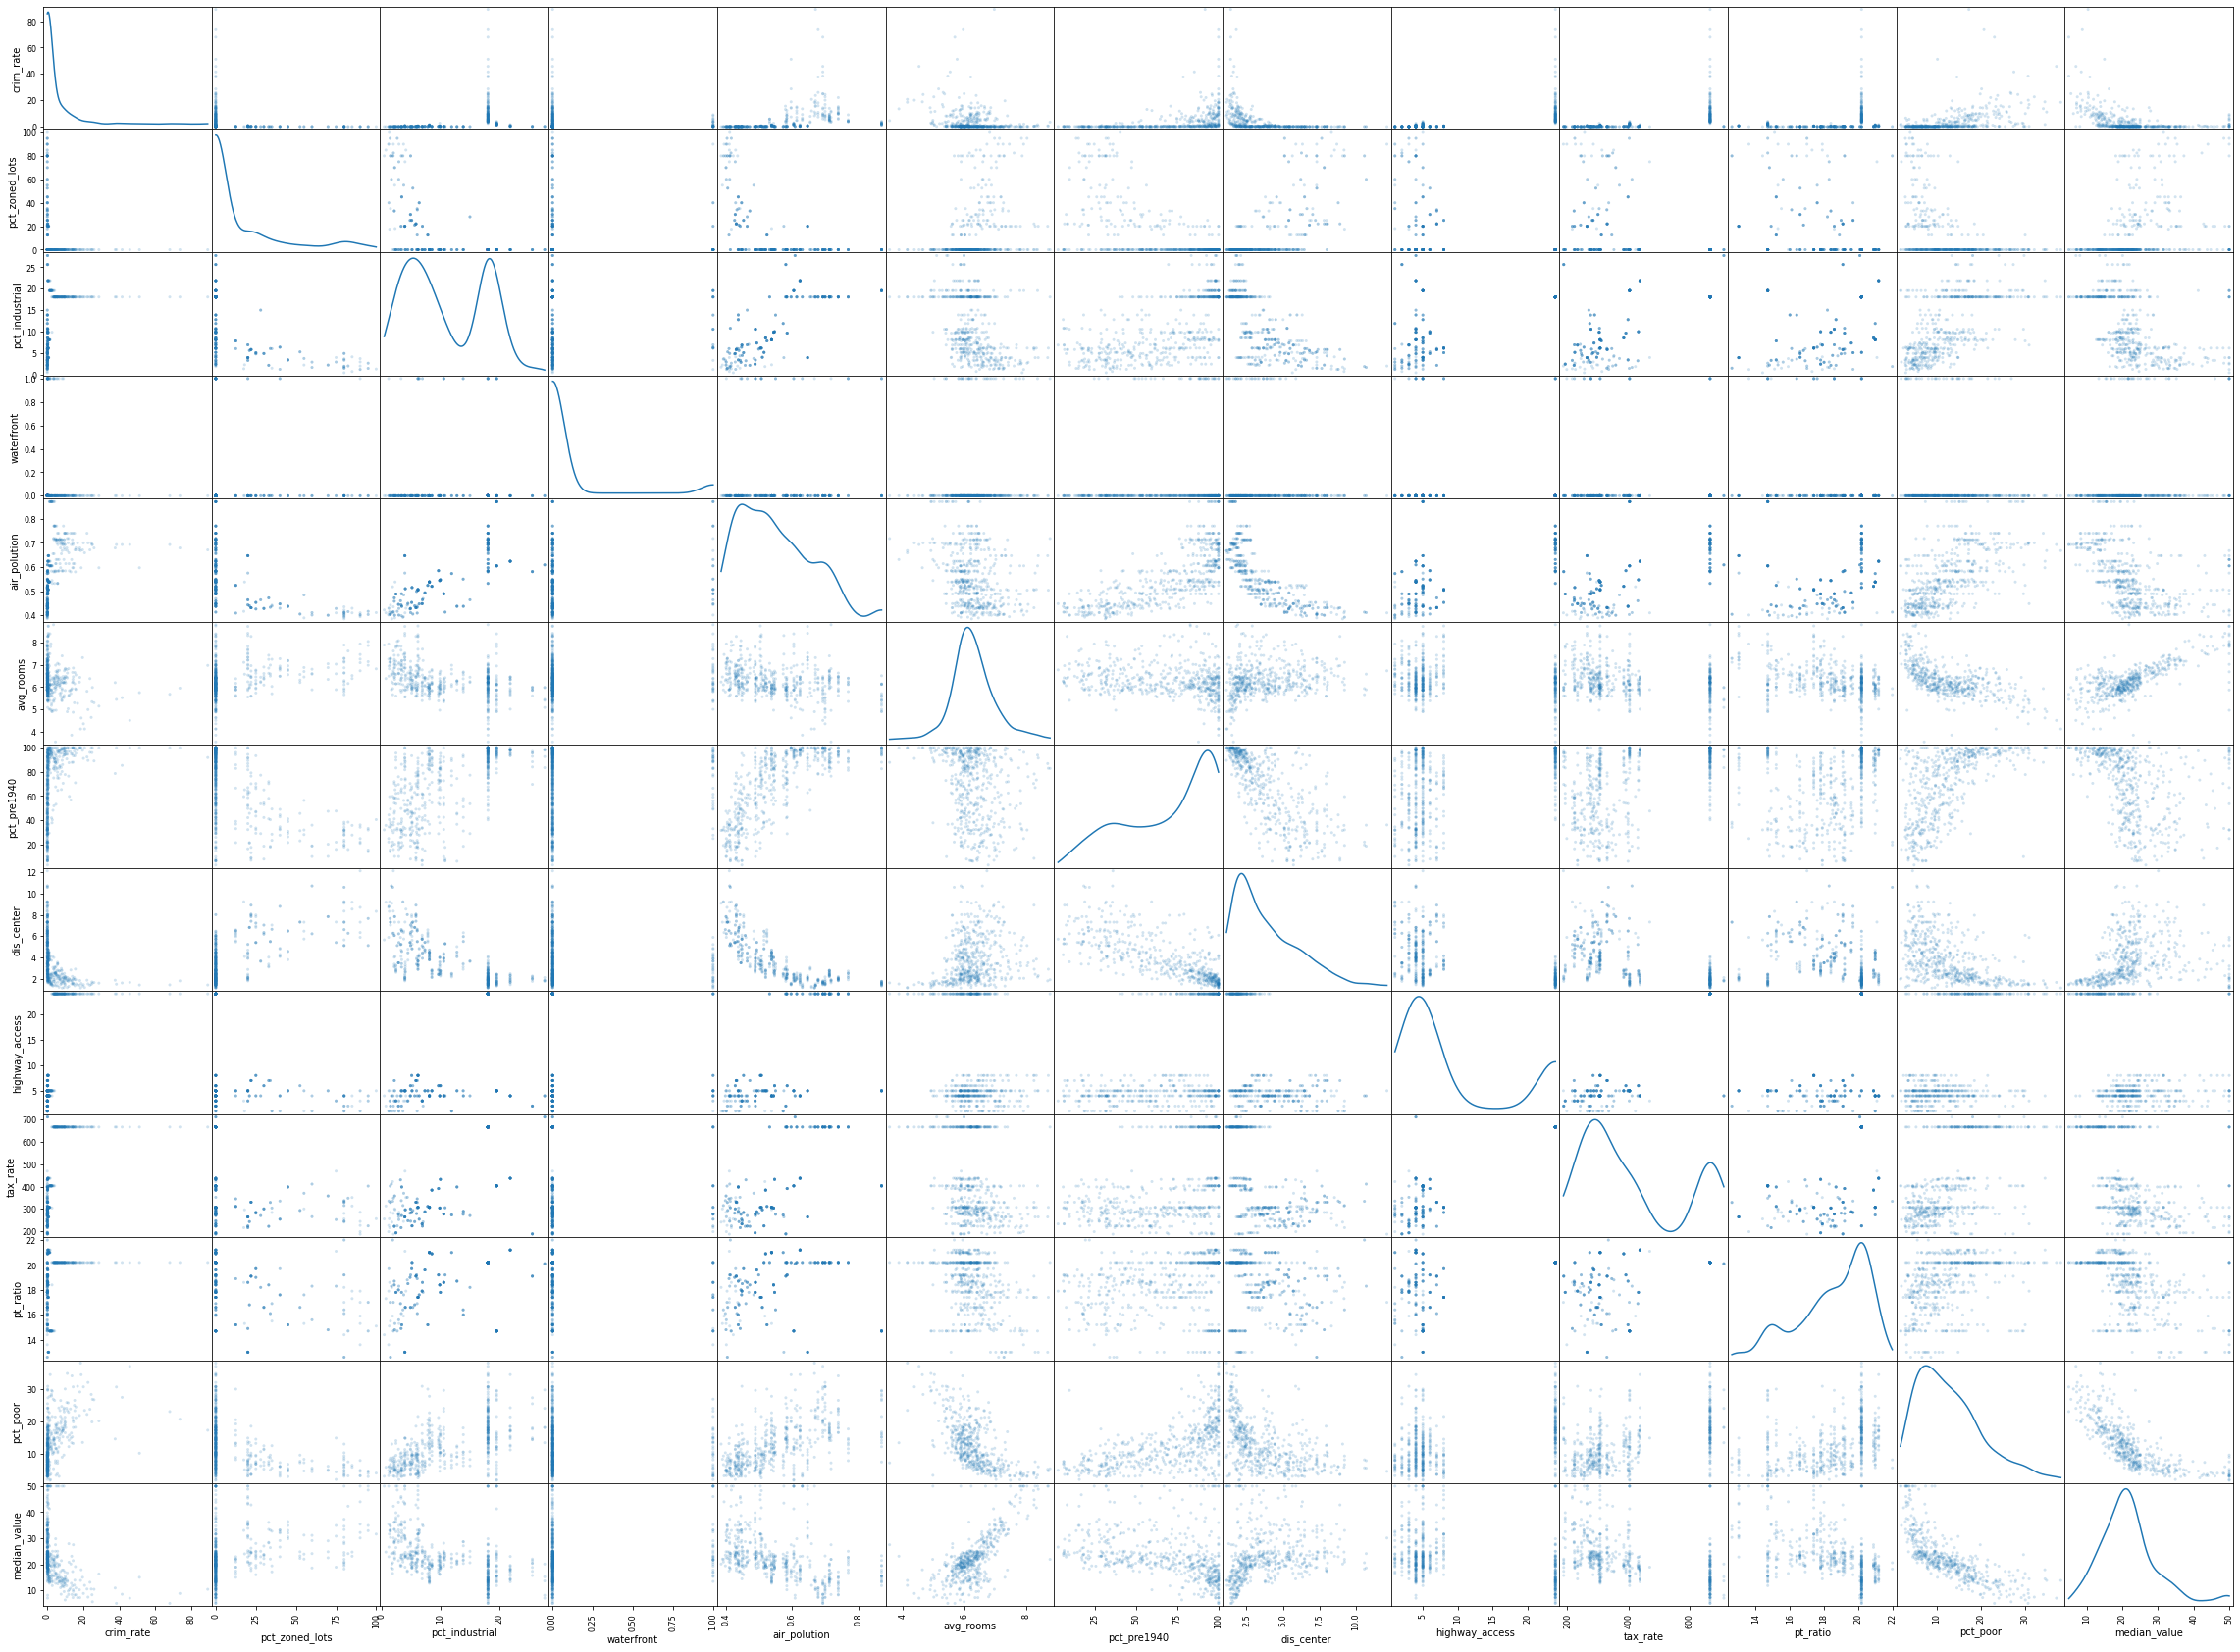

In [4]:
# Scatter Plot Matrix of Continious Variabls
scatter_matrix(boston, alpha = 0.2, figsize = (40, 30), diagonal = 'kde'); plt.show()

In [5]:
#plot correlation for continuous variables
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

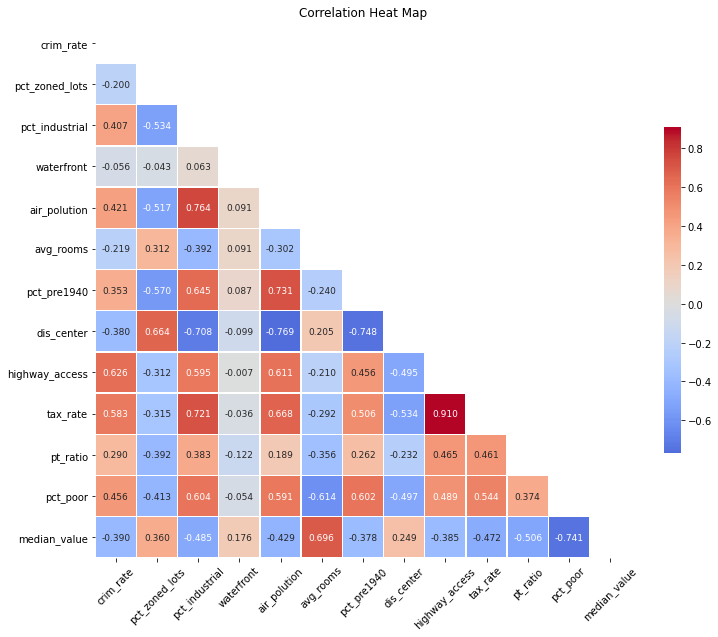

In [6]:
# examine intercorrelations among variables with correlation matrix
corr_chart(df_corr = boston) 

# Modeling

Explanatory Variables Transformation Using Standardscaler

In [7]:
label = 'median_value'
features = boston.columns.values[boston.columns != label]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Define scaled explanatory variables as an array for sklearn use
X = scaler.fit_transform(boston.drop(['median_value'], axis=1).values)
# Define target as an array for sklearn use
y = boston['median_value'].values


KFold Cross-Validation

In [8]:
# K, intialized to 10 for ten-fold cross-validation
K = 10
# Use KFold cross-validation to split data for training
cv = KFold(n_splits=K, shuffle=False, random_state=RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [9]:
# list of regression model names, including alternative versions of random forests and gradient boosting models
names = ['Linear Regression', 'Ridge Regression',
          'Lasso Regression', 'Elastic Net Regression',
         'RandomForestRegressor1', 'RandomForestRegressor2',
        'RandomForestRegressor3', 'RandomForestRegressor4',
        'GradientBoostingRegressor1','GradientBoostingRegressor2',
        'GradientBoostingRegressor3','GradientBoostingRegressor4'] 

# Construct a list of models to iterate over for evaluation, set normalize=False because we have standardized
models = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT),
          Ridge(alpha = 0.01, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED),
          Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     random_state = RANDOM_SEED),
          ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False, 
                          random_state = RANDOM_SEED),
          RandomForestRegressor(n_estimators=100, max_depth=5,
                                random_state=RANDOM_SEED),
          RandomForestRegressor(n_estimators=100, max_depth=2,
                                random_state=RANDOM_SEED),
          RandomForestRegressor(n_estimators=100,max_features=5, 
                                random_state=RANDOM_SEED),
          RandomForestRegressor(n_estimators=100,max_features="log2", 
                                random_state=RANDOM_SEED),
         GradientBoostingRegressor(max_depth=5, n_estimators=100,
                                   random_state=RANDOM_SEED),
         GradientBoostingRegressor(max_depth=2, n_estimators=100, 
                                   random_state=RANDOM_SEED),
         GradientBoostingRegressor(max_features=10, n_estimators=100, 
                                   random_state=RANDOM_SEED),
         GradientBoostingRegressor(max_features=5, n_estimators=100, 
                                   random_state=RANDOM_SEED)]


In [10]:
# stores cross validation results
cvr = np.zeros((K, len(names)))
# check the splitting process by looking at fold observation counts
fold_index = 0  # fold count initialized 
for training, test in cv.split(X,y):
    print('\nFold index:', fold_index) 
    X_train = X[training]
    X_test = X[test]
    y_train = y[training]
    y_test = y[test]
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    # variable model_index, initialize to zero
    model_index = 0 
    for name, reg_model in zip(names, models):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        #print('Fitted regression intercept:', reg_model.intercept_)
        #print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        RMSE = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', RMSE,
              '\n--------------------------------------------------------\n')
        cvr[fold_index, model_index] = RMSE
        model_index += 1
    
    fold_index += 1



Fold index: 0

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Coefficient of determination (R-squared): 0.7650752349379013
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 2.825624591111432 
--------------------------------------------------------


Regression model evaluation for: Ridge Regression
  Scikit Learn method: Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='cholesky', tol=0.001)
Coefficient of determination (R-squared): 0.7650953424269886
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 2.8255036

In [11]:
# cv_results_df, pandas DataFrame, store cross validation results
labels = ['Linear Regression', 'Ridge Regression',
          'Lasso Regression', 'Elastic Net Regression',
          'RandomForestRegressor1', 'RandomForestRegressor2',
        'RandomForestRegressor3', 'RandomForestRegressor4',
        'GradientBoostingRegressor1','GradientBoostingRegressor2',
        'GradientBoostingRegressor3','GradientBoostingRegressor4']
cvr_df = pd.DataFrame(cvr,columns=labels)
results=cvr_df.rename_axis('Fold')

In [12]:
labels=['RMSE Mean','RMSE Std']
df=pd.DataFrame([results.mean(),results.std()]).T

In [13]:
df.columns=labels
df.sort_values('RMSE Mean',ascending=True)

,RMSE Mean,RMSE Std
GradientBoostingRegressor4,3.834897,1.681596
GradientBoostingRegressor2,3.878283,1.814575
RandomForestRegressor3,3.892794,1.924959
GradientBoostingRegressor3,3.914109,1.698106
RandomForestRegressor4,4.030433,1.958019
RandomForestRegressor1,4.265888,2.163952
GradientBoostingRegressor1,4.421791,2.233848
RandomForestRegressor2,4.926547,2.485892
Elastic Net Regression,4.979339,2.873874
Lasso Regression,5.066150,2.961811


Model Implementation

In [23]:
def display_feature_importance(model):
  importances = model.feature_importances_
  std = np.std([model.feature_importances_ for tree in model.estimators_],
               axis=0)
  indices = np.argsort(importances)[::-1]

  # Print the feature ranking
  print("Feature ranking:")
  
  feats = []
  for f in range(X.shape[1]):
      print( features[indices[f]], ", F[%d] (%f)" % (f + 1, importances[indices[f]]))
      feats.append(features[indices[f]])
      
  # Plot the feature importances of the forest
  plt.figure()
  plt.title("Feature importances")
  plt.bar(range(X.shape[1]), importances[indices],
         color="blue", yerr=std[indices], align="center")
  plt.xticks(range(X.shape[1]), feats)
  plt.xlim([-1, X.shape[1]])
  plt.xticks(rotation='vertical')
  plt.show()

In [24]:
def get_performance(model_name, model, X_test, y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  test_score = model.score(X_test, y_test)
  train_score = model.score(X_train, y_train)
  return mse, rmse, test_score, train_score

In [25]:
def fit_pred( model, X_train, y_train, X_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  plt.scatter(y_test, y_pred); plt.show()
  return y_pred

In [26]:
#split data by training & test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=RANDOM_SEED)

In [27]:
#best model
GBR4=GradientBoostingRegressor(max_features=5, n_estimators=100, 
                                   random_state=RANDOM_SEED)

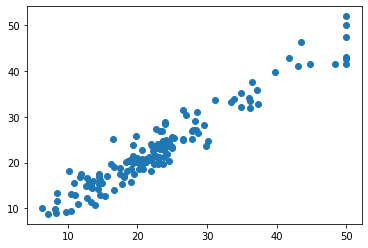

,Regressor,MSE,RMSE,Train Score,Test Score
0,GradientBoostingRegressor4,7.78841,2.79077,0.978216,0.915075


In [28]:
#best model performance
GBR_pred = fit_pred(GBR4, X_train, y_train, X_test)
GBR_mse, GBR_rmse, GBR_test_score, GBR_train_score = get_performance('Gradient Boosting Regressor 4', GBR4, X_test, y_test, GBR_pred)
GBR_perf = pd.DataFrame(['GradientBoostingRegressor4', GBR_mse, GBR_rmse, GBR_train_score, GBR_test_score]).T
perf_cols = ['Regressor', 'MSE', 'RMSE', 'Train Score','Test Score' ]
GBR_perf.columns = perf_cols
GBR_perf

Feature ranking:
pct_poor , F[1] (0.384706)
avg_rooms , F[2] (0.205196)
pct_industrial , F[3] (0.113398)
dis_center , F[4] (0.080573)
air_polution , F[5] (0.060802)
pt_ratio , F[6] (0.059399)
pct_pre1940 , F[7] (0.046810)
crim_rate , F[8] (0.027224)
tax_rate , F[9] (0.016448)
waterfront , F[10] (0.002662)
highway_access , F[11] (0.002225)
pct_zoned_lots , F[12] (0.000556)


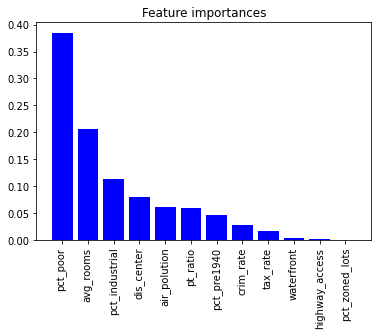

In [29]:
display_feature_importance(GBR4)

In [30]:
#define best Random Forest model
RFR3= RandomForestRegressor(n_estimators=100,max_features=5, 
                                random_state=RANDOM_SEED)

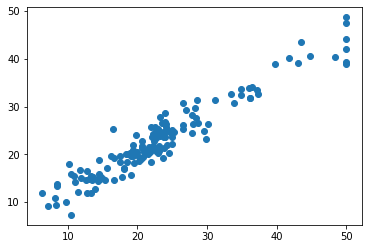

,Regressor,MSE,RMSE,Train Score,Test Score
0,Random Forest Regressor 3,9.28134,3.04653,0.981897,0.898796


In [31]:
#best random forest model performance
RFR3_pred = fit_pred(RFR3, X_train, y_train, X_test)
RFR3_mse, RFR3_rmse, RFR3_test_score, RFR3_train_score = get_performance('Random Forest Regressor 3', RFR3, X_test, y_test, RFR3_pred)
RFR3_perf = pd.DataFrame(['Random Forest Regressor 3', RFR3_mse, RFR3_rmse, RFR3_train_score, RFR3_test_score]).T
perf_cols = ['Regressor', 'MSE', 'RMSE', 'Train Score','Test Score' ]
RFR3_perf.columns = perf_cols
RFR3_perf

Feature ranking:
pct_poor , F[1] (0.382329)
avg_rooms , F[2] (0.260181)
air_polution , F[3] (0.062060)
dis_center , F[4] (0.060174)
crim_rate , F[5] (0.059243)
pct_industrial , F[6] (0.051254)
pct_pre1940 , F[7] (0.044533)
pt_ratio , F[8] (0.043602)
tax_rate , F[9] (0.018841)
highway_access , F[10] (0.009540)
pct_zoned_lots , F[11] (0.005185)
waterfront , F[12] (0.003057)


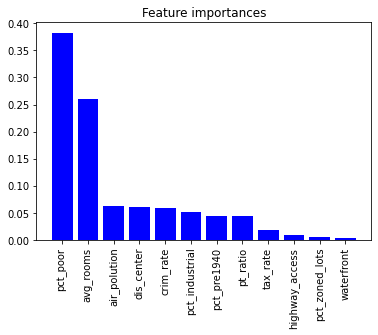

In [32]:
display_feature_importance(RFR3)


# Conclusion

**Background and management problem description**

As a real estate brokerage firm, assessing the market value of residential real estate is crucial to solicit customers and make profits. Though traditional methods of valuation would work well, it can be labor intense and time consuming. To reduce the manual effort involved in the evaluation and better allocate resources, we can employ machine learning techniques that can predict the value of a home based on the data collected from the housing areas brokers are targeting. In addition, implementing an appropriate machine learning approach with improvement overtime by feeding more data, we can calibrate the accuracy of predictions on a forward-looking basis which will benefit the company with valuable information.

In the prior analysis, we evaluated four modeling techniques,
a standard linear regression, a Ridge model, a Lasso model and a Elastic Net model. Compared the modeling using a 70/30 split shows that the RMSEs for both train set and test set are similar for each model, among four models, on the training set, Linear model works best with the lowest RMSE, on the testing set, Ridge model works best.

The evaluation result from the ten-fold cross-validation with setted alpha for each regression model and a 100,000 iteration, shows that Elastic Net regression model has the lowest RMSE on average, followed by Lasso regression. On the other hand, Linear regression has the highest RMSE which indicated a poor performance among four regression models. 

In this research, we continued to examine tree-based regression models in attempt to improve on the model fit. 

**Research design and modeling methods**

We used all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study in this evaluation. The response variable is the median value of homes in thousands of 1970 dollars. 

As the data set is the same in Assignment 2, there were no additional discoveries in the exploratory data analysis.

The most important point to note is that our response variable “median_value” has the highest positive correlation with “avg_rooms” and has the highest negative correlation with percentage of population of lower socio-economic status (“pct_poor”). These are the most normally distributed variables with the clearest linear relationship to the response variable.

Continued with Assignment 2, other than the four non-tree based regression models including Linear, Ridge, Lasso and Elastic Net, tree-based regression machine learning models are included in this research. Each of these models have their own nuanced data preprocessing requirements, as the non-tree based approaches perform better when the data is of a monotonic scale; on the other hand, the tree-based algorithms are not affected by monotonic transformation of explanatory variables. Therefore, applied a datatransformation for both non-tree based approaches and tree-based approaches to improve the overall performance.

We evaluated these models within a KFold cross-validation design, where K=10. The root mean-squared error (RMSE) is used as an index of prediction error to compare the performance of each model. We employed a standard test harness for each of the models, so that they are evaluated on an apples-to-apples basis.

For tree-based approaches, we tried four alternative versions of random forests and gradient boosting regressions respectively, with different hyperparameters.

All 12 regression models along with cross validation designs using root mean-squared error metric for performance evaluation were implemented within SciKit Learn environment. 


**Results and Recommendations** 

Overall, the tree-based approaches outperformed the non-tree-based approaches with smaller RMSE on average and lower standard deviation across 10 folds.

Narrowing down to tree-based approaches, it was observed that Gradient boosting regression 4 with max_features=5 and n_estimators=100 is the best performer. Among four Random Forest Regression models, Random Forest 3 with max_features=5 and n_estimators=100 performed best.

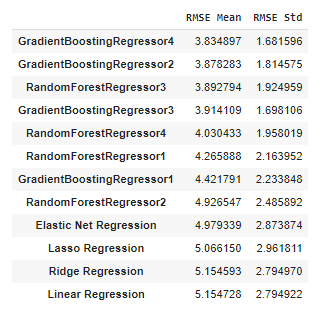


Given the results, it appears that Gradient boosting regression 4 would be the recommended model for the firm.

Employ the best model to the full dataset with a 70/30 split, the ‘feature importance’ for this recommended model shows that pct_poor and avg_room are the most influencial factors in determining the median value of a given home with the highest weights. In addition, this model has the best balance between training and test scores and has a good diversification of influence across multiple variables, as shown above in the ‘feature importance’ plot. 

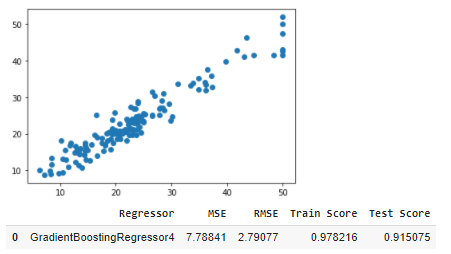

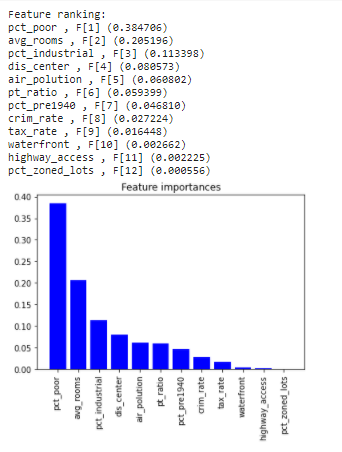


Though random forest regression does not rank at the first place, we still employ the best performed random forest regression model to the full dataset with the same split, in order to comparing the differences in the feature importance between gradient boosting regression and random forest regression. From the bar chart, it is observed that for random forest regression, the top two features are the same as for the gradient boosting regressions, however, the weights for these two features are less imbalanced compared with those in igradient boosting regressions. Furthermore, the following rank of features are different from gradient boosting regression as well.

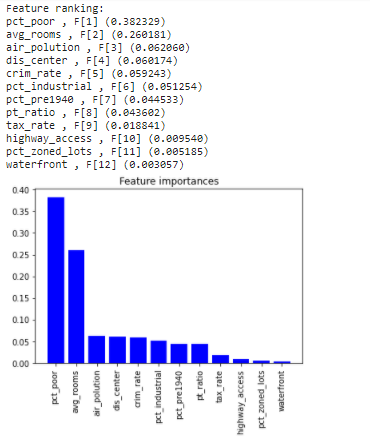


Based on our evaluation, we would recommend that the firm to implement tree-based algorithm to facilitate market value evaluation, however, to increase the prediction accuracy and performance of models, it is recommended to continue the examination with combination of varied hyperparameters setting.